# Implementation of Linear Regression

In [ ]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Linear Regression Model
class Linear_Regression:
    def __init__(self,lr= 0.01,n_itrs = 5000):
        self.lr = lr
        self.n_itrs = n_itrs
        self.weights = None
        self.bias = None

    # training a model
    def fit(self, x , y):
       if x.ndim == 1:
            x = x.reshape(-1, 1)
       n_samples, n_features = x.shape
       self.weights = np.zeros(n_features)
       self.bias = 0
       for i in range(self.n_itrs):
          y_pred = np.dot(x, self.weights) + self.bias
          dw = (1/n_samples) * np.dot(x.T, (y_pred - y))
          db = (1/n_samples) * np.sum(y_pred - y)

          self.weights -= self.lr * dw
          self.bias -= self.lr * db

    # Testing a model
    def predict(self, x):
        if x.ndim == 1:
            x = x.reshape(-1, 1)
        y_pred = np.dot(x, self.weights) + self.bias
        return y_pred

    # plotting a graph
    def plot_graph(self, x,y,phase='Train'):
        plt.plot(x, y, 'ro', label=phase)
        plt.plot(x, self.predict(x), label='Fitted line')
        plt.legend()
        plt.show()

    # calculating mean squared error
    def mse(self, y_test, y_pred):
        return np.mean((y_test - y_pred)**2)

In [ ]:
# Reading a dataset
import pandas as pd
data = pd.read_excel("/content/LR_Share1.xlsx")
data
x= np.array(data['X'])
y= np.array(data['Y'])

# splitting a dataset
x_train = x[:int(0.8*x.shape[0])]
y_train = y[:int(0.8*y.shape[0])]
x_test = x[int(0.8*x.shape[0]):]
y_test = y[int(0.8*y.shape[0]):]

In [ ]:
# initializing a model
LinReg = Linear_Regression(lr = 0.01)

# Training a model (fitting a line ) with train data
LinReg.fit(x_train,y_train)

In [ ]:
# Predicting the results on new samples (testing phase)
pred  = LinReg.predict(x_test)
pred

array([26.74469737, 25.72007144, 28.85392734, 20.57195089, 22.57122101,
       18.57268078, 22.52123925])

In [ ]:
# calculating mean squared error
mse = LinReg.mse(y_test,pred)
mse

6.8305303481701936

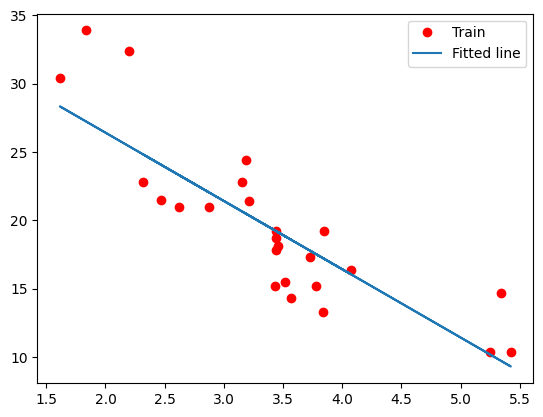

In [ ]:
# plotting a Linear curve to fit training data
LinReg.plot_graph(x_train,y_train)

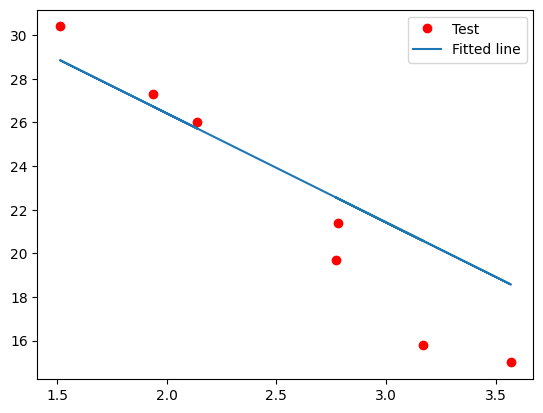

In [ ]:
# plotting a linear line on test data
LinReg.plot_graph(x_test,y_test,"Test")

In [ ]:
#done